# Машинное обучение, DS-поток, осень 2022
## Задание 3.5


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 20 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 40 баллов;
* Задача 4 &mdash; 120 баллов;
* Задача 5 &mdash; 30 баллов.

$\huge Изменения$

4) Занес графики с метриками на одно полотно. Исправил в критериях sum на mean

5) Занес графики с метриками на одно полотно

## Задача 1

Докажите, что критерий Джини равен вероятности ошибки случайного классификатора, который выдаёт предсказания с вероятностями пропорционально доле классов в выборке. 

![](1.jpg)

## Задача 2

Пусть $X = (x_1, ..., x_n)$ &mdash; выборка объектов и $Y = (Y_1, ..., Y_n)$ &mdash; соответствующие значения вещественного отклика. Критерий информативности для набора объектов вычисляется на основе того, насколько хорошо их отклик предсказывается константой:

$$
H(X) = \min_{c \in Y} \dfrac{1}{n} \sum_{i=1}^n L(Y_i, c),
$$

где $L(y, c)$ &mdash; некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(X)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y, c) = (y-c)^2$;
2. $L(y, c) = |y-c|$.

Найдите также оптимальное предсказание в листьях дерева.

![](2.jpg)

## Задача 3

В случае задачи классификации рассматривается вероятностное предсказание, и критерий информативности имеет вид
$$H(X) = \min_{\stackrel{p_1, ..., p_K \in [0, 1]}{p_1+...+p_K=1}} \dfrac{1}{n} \sum_{i=1}^n L\left(Y_i, \{p_k\}\right).$$
Выведите и упростите критерии информативности, найдите оптимальные оценки вероятностей в листах для следующих функций потерь:
* $L(y, \{p_k\}) = \sum_{k=1}^K \left(p_k-I\{y=k\}\right)^2$;
* $L(y, \{p_k\}) = -\sum_{k=1}^K I\{ y=k\}\log p_k$.

![](3.jpg)

![](4.jpg)

![](5.jpg)

![](6.jpg)

## Задача 4

In [1]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_wine
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import tqdm

warnings.filterwarnings('ignore')
sns.set(font_scale=1.6)
plt.rcParams['axes.facecolor'] = 'lightgrey'

Вспомним, как именно происходит построение решающего дерева. Для построения дерева в каждой нелистовой вершине происходит разбиение подвыборки на две части по некоторому признаку $x_j$. Этот признак и порог $t$, по которому будет происходить разбиение, мы хотим брать не произвольно, а основываясь на соображениях оптимальности.  Для этого нам необходимо знать некоторый фукционал качества, который будем оптимизировать при построении разбиения. 

Обозначим через $X_m$ — множество объектов, попавших в вершину $m$, разбиваемую на данном шаге, а через $X_l$ и $X_r$ — объекты, попадающие в левое и правое поддерево соответственно при заданном правиле $I\{x_j < t\}$. Пусть также $H$ — используемый критерий информативности (impurity criterion).

Выпишите функционал, который необходимо минимизировать при разбиении вершины:

**Ответ:** $|X_l|\cdot H(X_l) + |X_r|\cdot H(X_r)$

**Реализация критериев информативности.**


Вспомните еще раз, на какой общей идее основаны критерии информативности и какую характеристику выборки они стремятся оптимизировать?

**Ответ:** Критерий  говорит на сколько все будет плохо если данная вершина окажеться листом. Оптимизирует большое количество представителей разных классов в вершине.


Перед тем, как непосредственно работать с решающими деревьями, реализуйте функции подсчёта значения критериев разбиения вершин решающих деревьев. Использовать готовые реализации критериев или классов для решающих деревьев из `sklearn` и из других библиотек **запрещено.** Также при реализации критериев по причине неэффективности **запрещается использовать циклы**. Воспользуйтесь библиотекой `numpy`.

Каждая функция принимает на вход одномерный `numpy` — массив размерности `(n,)` из значений отклика.

In [19]:
# Код функций, реализующих критерии разбиения. 

def mean_square_criterion(y):
    y = np.array(y)
    return np.mean(((y - y.mean()) ** 2))


def mean_abs_criterion(y):
    ''' Критерий для абсолютной функции потерь. '''
    y = np.array(y)
    return np.mean((np.abs(y - np.median(y))))


def get_probs_by_y(y):
    ''' Возвращает вектор частот для каждого класса выборки. '''
    y = np.array(y)    
    clas, count = np.unique(y, return_counts=True)
    return count / count.sum()


def gini_criterion(y):
    ''' Критерий Джини. '''
    y = np.array(y)
    p = get_probs_by_y(y)
    return (p * (1 - p)).sum()


def entropy_criterion(y):
    ''' Энтропийный критерий. '''
    y = np.array(y)
    p = get_probs_by_y(y)
    return - (p * np.log(p)).sum()

Протестируйте реализованные функции.

Тесты для распределения вероятностей на классах.

In [3]:
assert np.allclose(get_probs_by_y([1, 1, 2, 2, 7]), np.array([0.4, 0.4, 0.2]))
assert np.allclose(get_probs_by_y([1]), np.array([1]))

Тесты для критериев разбиения.

In [4]:
assert np.allclose(entropy_criterion([25]), 0)
assert np.allclose(gini_criterion([25]), 0)
assert np.allclose(mean_square_criterion([10, 10, 10]), 0)
assert np.allclose(mean_abs_criterion([10, 10, 10]), 0)

**Реализация класса решающего дерева.**

Для того, чтобы лучше понять, как устроены решающие деревья и как именно устроен процесс их построения, вам предлагается реализавать класс `BaseDecisionTree`, реализующий базовые функции решающего дерева.  Большая часть кода уже написана. 

Используются следующие классы:

**Класс** `BaseDecisionTree` — класс для решающего дерева, в котором реализовано построение дерева. Все вершины дерева хранятся в списке `self.nodes`, при этом вершина с номером 0 — корень.


* `__init__` — инициализация дерева. Здесь сохраняются гиперпараметры дерева: `criterion`, `max_depth`, `min_samples_split` и инициализируется список вершин, состоящий только из одной вершины — корневой,
* `build_` — рекурсивная функция построения дерева. В ней при посещении каждой вершины дерева проверяются условия, стоит ли продолжать разбивать эту вершину. Если да, то перебираются все возможные признаки и пороговые значения и выбирается та пара (признак, значение), которой соответствует наименьшее значение критерия информативности,
* `fit` — функция обучения дерева, принимающая на вход обучающую выборку. В этой функции происходит предподсчёт всех возможных пороговых значений для каждого из признаков, а затем вызывается функция `build_`.

**Класс** `Node` — класс вершины дерева. Внутри вершины, помимо раздяляющего признака и порога хранятся `self.left_son`, `self.right_son` — номера дочерних вершин, а также `self.left_prob` и `self.right_prob` — вероятности попадания элемента в каждую из них. При этом в листовых вершиных хранятся также `self.y_values` — значения соответствующих элементов выборки, попавших в вершину.

* `__init__` — инициализация вершины. Принимает в качестве аргументов разделяющий признак и пороговое значение и сохраняет их.

**Класс** `DecisionTreeRegressor` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи регрессии.

* `predict_instance` — получение предсказания для одного элемента выборки. Выполняется посредством спуска по решающему дереву до листовой вершины,

* `predict` — получение предсказаний для всех элементов выборки.


**Класс** `DecisionTreeClassifier` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи классификации.
* `predict_proba_instance` — предсказание распределения вероятностей по классам для одного элемента выборки, 
* `predict_proba` — предсказание распределения вероятностей по классам для всех элементов выборки,
* `predict` — предсказание меток классов для всех элементов выборки.

Перед написанием кода разбиения дерева, ответьте на вопрос, какие пороговые значения для каждого из признаков вы будете перебирать. Почему рассматривать другие значения в качестве пороговых не имеет смысла?

**Ответ:** Перебирать буду для каждого из признаков все прешедшие различные реализации признака. Перебирать все остальное не имеет смысла так как для обучающей оно сведеться к первому случаю. 

**Структура решающего дерева**


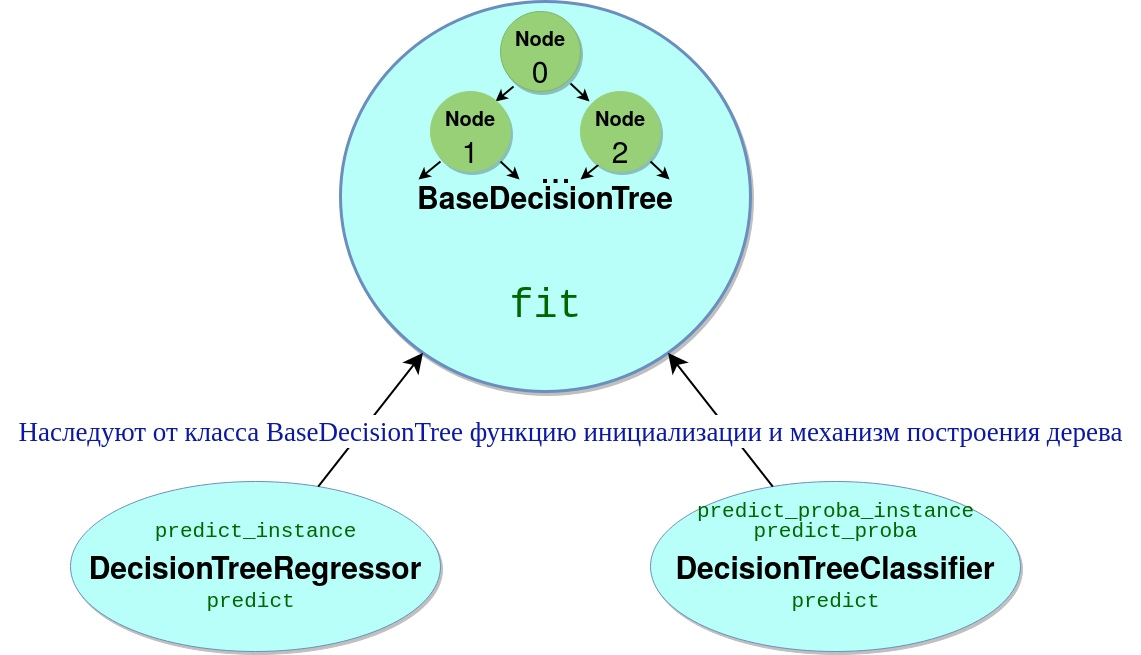

In [5]:
def get_not_nans(arr):
    '''
    Функция, которая создаёт и возвращает новый массив 
    из всех элементов переданного массива, не являющихся None.
    '''
    
    return arr.copy()[~np.isnan(arr)]


class Node(object):
    def __init__(self, split_feature=None, split_threshold=None):
        '''
        Функция инициализации вершины решающего дерева.
        
        Параметры.
        1) split_feature — номер разделяющего признака
        2) split_threshold — пороговое значение
        '''
        
        self.split_feature = split_feature
        self.split_threshold = split_threshold

        # По умолчанию считаем, что у вершины нет дочерних вершин.
        self.left_son, self.right_son = None, None

        # Вероятности попадания в каждую из дочерних вершин нужно поддерживать 
        # для корректной обработки данных с пропусками
        self.left_prob, self.right_prob = 0, 0

        # Массив значений y. Определён только для листовых вершин дерева
        self.y_values = None
        

class BaseDecisionTree(BaseEstimator):
    '''
    Здесь содержится реализация всех основных функций для работы
    с решающим деревом.
    
    Наследование от класса BaseEstimator нужно для того, чтобы 
    в дальнейшем данный   класс можно было использовать в 
    различных функциях библиотеки sklearn, например, в функциях 
    для кросс-валидации.
    '''
    
    def __init__(self, criterion, max_depth=np.inf, min_samples_split=2):
        '''
        Функция инициализации решающего дерева.
        
        Параметры.
        1) criterion — критерий информативности, 
        2) max_depth — максимальная глубина дерева,
        3) min_samples_split — минимальное количество элементов 
        обучающей выборки,  которое должно попасть в вершину, 
        чтобы потом происходило разбиение этой вершины.
        '''
        
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

        # Список всех вершин дерева. В самом начале 
        # работы алгоритма есть только одна 
        # вершина — корень.
        self.nodes = [Node()]

        # Количество классов. Актуально только 
        # при решении задачи классификации.
        self.class_count = 1

        # Сюда нужно будет записать все значения 
        # для каждого из признаков датасета
        # (они будут нашими порогами).
        self.feature_values = None
    
    def build_(self, v, X, y, depth=0):
        '''
        Рекурсивная функция построения решающего дерева.
        
        Параметры.
        1) v — номер рассматриваемой вершины
        2) X, y — обучающая выборка, попавшая в текущую вершину
        3) depth — глубина вершины с номером v
        '''
        if depth == self.max_depth or len(y) < self.min_samples_split or len(np.unique(y)) == 1:
            # Еcли строим дерево для классификации, то 
            # сохраняем метки классов всех элементов выборки,
            # попавших в вершину.
            if callable(getattr(self, 'set_class_count', None)):
                self.nodes[v].y_values = y.copy()

            # Для регрессии сразу вычислим среднее всех 
            # элементов вершины.
            else:
                self.nodes[v].y_values = np.mean(y)
            return
        
        best_criterion_value = np.inf
        best_feature, best_threshold = 0, 0
        sample_size, feature_count = X.shape
        
        # переберём все возможные признаки и значения порогов,
        # найдём оптимальный признак и значение порога 
        # и запишем их в best_feature, best_threshold
        for feature_id in range(feature_count):
            for threshold in self.feature_values[feature_id]:
                y_nan = y[np.isnan(X.T[feature_id])]
                y_left = y[X.T[feature_id] < threshold]
                y_right = y[X.T[feature_id] >= threshold]
                sum_len = len(y_nan) + len(y_left) + len(y_right)
                if(len(y_left) == 0 or len(y_right) == 0):
                    continue
                criterion_values = ((sum_len - len(y_nan)) / sum_len )*(self.criterion(y_left) * len(y_left) + self.criterion(y_right) * len(y_right))
                if (criterion_values < best_criterion_value):
                        best_feature, best_threshold = feature_id, threshold
                        best_criterion_value = criterion_values
            
        # сохраним найденные параметры в класс текущей вершины
        self.nodes[v].split_feature = best_feature
        self.nodes[v].split_threshold = best_threshold
        # разделим выборку на 2 части по порогу
        left_index = X.T[best_feature] < best_threshold
        right_index = X.T[best_feature] >= best_threshold
        X_l, y_l = X[~right_index], y[~right_index]
        X_r, y_r = X[~left_index], y[~left_index]
        
        # создаём левую и правую дочерние вершины,
        # и кладём их в массив self.nodes 
        self.nodes.append(Node())
        self.nodes.append(Node())
        
        # сохраняем индексы созданных вершин в качестве 
        # левого и правого сына вершины v
        self.nodes[v].left_son, self.nodes[v].right_son =\
            len(self.nodes)-2, len(self.nodes)-1
        summ_len = len(y_l) + len(y_r)
        len_none = len(y[np.isnan(X.T[best_feature])])
        self.nodes[v].left_prob, self.nodes[v].right_prob = len(y_l - len_none) / summ_len, len(y_r - len_none) / summ_len
        # рекурсивно строим дерево для дочерних вершин
        #print('l ', len(y_l), ' r ', len(y_r))
        self.build_(self.nodes[v].left_son, X_l, y_l, depth+1)
        self.build_(self.nodes[v].right_son, X_r, y_r, depth+1)
    
    def fit(self, X, y):
        '''
        Функция, из которой запускается построение 
        решающего дерева по обучающей выборке.
        
        Параметры.
        X, y — обучающая выборка
        '''
        
        # сохраним заранее все пороги для каждого из 
        # признаков обучающей выборки
        X, y = np.array(X), np.array(y)
        self.feature_values = []
        for feature_id in range(X.shape[1]):
            self.feature_values.append(
                np.unique(get_not_nans(X[:, feature_id]))
            )
            
        set_class_count = getattr(self, 'set_class_count', None)

        # если строится дерево для классификации, 
        # то нужно посчитать количество классов 
        if callable(set_class_count):
            set_class_count(y)
        self.build_(0, X, y)

Теперь, когда общий код решающего дерева написан, нужно сделать обёртки над `BaseDecisionTree` — классы `DecisionTreeRegressor` и `DecisionTreeClassifier` для использования решающего дерева в задачах регрессии и классификации соответственно.

Допишите функции `predict_instance` и `predict_proba_instance` в классах для регрессии и классификации соответственно. В этих функциях нужно для одного элемента $x$ выборки промоделировать спуск в решающем дереве, а затем по листовой вершине, в которой окажется объект, посчитать для классификации — распределение вероятностей, а для регрессии — число $y$.

In [6]:
class DecisionTreeRegressor(BaseDecisionTree):
    def predict_instance(self, x, v):
        '''
        Рекурсивная функция, предсказывающая значение
        y для одного элемента x из выборки.
        
        Параметры.
        1) x — элемент выборки, для которого
        требуется предсказать значение y
        2) v — рассматриваемая вершина дерева
        '''
        
        # если вершина — лист, возвращаем в качестве предсказания 
        # среднее всех элементов, содержащихся в ней
        if self.nodes[v].left_son is None:
            return np.mean(self.nodes[v].y_values)
            
        # если у объекта x значение признака по
        # которому происходит разделение,  меньше 
        # порогового, то спускаемся в левое поддерево,
        # иначе — в правое
        if x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].right_son)
            
        # а если у элемента отсутствует значение 
        # разделяющего признака,  то будем спускаться 
        # в оба поддерева
        else:
            left_predict = self.predict_instance(x, self.nodes[v].left_son)
            right_predict = self.predict_instance(x, self.nodes[v].right_son)
            return (left_predict + right_predict) * 0.5
    
    def predict(self, X):
        '''
        Функция, предсказывающая значение
        y для всех элементов выборки X.
        
        Параметры.
        X — выборка, для которой требуется
        получить вектор предсказаний y
        '''
        
        return [self.predict_instance(x, 0) for x in X]

Для удобства реализации функции `predict_proba_instance` класса `DecisionTreeClassifier` будем считать, что все классы имеют целочисленные метки от 0 до $k-1$, где $k$ — количество классов. Если бы это условие не было выполнено, то нужно было бы сначала сделать предобработку меток классов в датасете.

In [7]:
class DecisionTreeClassifier(BaseDecisionTree):
    def set_class_count(self, y):
        '''
        Функция, вычисляющая количество классов 
        в обучающей выборке.
        
        Параметры.
        y — значения класса в обучающей выборке
        '''
        
        self.class_count = np.max(y) + 1
    
    def predict_proba_instance(self, x, v):
        '''
        Рекурсивная функция, предсказывающая вектор
        вероятностей принадлежности  объекта x
        к классам
        
        Параметры.
        1) x — элемент выборки, для которого 
        требуется предсказать значение y
        2) v — вершина дерева, в которой 
        находится алгоритм
        '''
        
        if self.nodes[v].left_son is None:
            # считаем долю каждого класса и возвращаем вектор вероятностей 
            proba_vector = np.zeros(self.class_count)
            clas, count = np.unique(self.nodes[v].y_values, return_counts=True)
            for i in zip(clas, count):
                proba_vector[i[0]] = i[1]
            return proba_vector / proba_vector.sum()
            
        # если у объекта x значение признака по которому
        # происходит разделение, меньше порогового, 
        # то спускаемся в левое поддерево, иначе — в правое
        if x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].right_son)
            
        # а если у объекта отсутствует значение 
        # разделяющего признака, то будем спускаться 
        # в оба поддерева
        else:
            left_predict = self.predict_proba_instance(
                x, self.nodes[v].left_son)
            right_predict = self.predict_proba_instance(
                x, self.nodes[v].right_son)
            
            return self.nodes[v].left_prob * left_predict + self.nodes[v].right_prob * right_predict
    
    def predict_proba(self, X):
        '''
        Функция, предсказывающая вектор вероятностей
        принадлежности объекта x к классам для 
        каждого x из X
        
        Параметры.
        X — выборка, для которой требуется получить вектор предсказаний y
        '''
        
        return [self.predict_proba_instance(x, 0) for x in X]
    
    def predict(self, X):
        '''
        Функция, предсказывающая метку класса для
        всех элементов выборки X.
        
        Параметры.
        X — выборка, для которой требуется получить
        вектор предсказаний y
        '''
        
        return np.argmax(self.predict_proba(X), axis=1)

**Подбор параметров.**

В этой части задания вам предлагается поработать с написанным решающим деревом, применив его к задачи классификации и регрессии, и в обеих задачах подобрать оптимальные параметры для построения.

Не забывайте писать выводы.

**1. Задача классификации.**

Теперь самое время протестировать работу написанного нами решающего дерева. Делать мы это будем на датасете для классификации вина из `sklearn`.

In [8]:
X, y = load_wine(return_X_y=True)
X, y = X[~np.isnan(y)], y[~np.isnan(y)]

In [9]:
count_of_experiment = y.shape[0]

Проверим насколько классы в той форме в которой мы их ожидаем

In [10]:
np.unique(y)

array([0, 1, 2])

Классы в нужной форме

Далее для критерия Джини и энтропийного критерия найдем оптимальные параметры обучения дерева — `max_depth` и `min_samples_split`.

In [11]:
classification_criteria = [gini_criterion, entropy_criterion]
criterion_names = ['Джинни', 'Энтропийный']

С начала надо разбить выборку на train и test.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=149)

Теперь проведите кросс-валидацию для каждого из критериев разбиения вершин.

Зададим гипер параметры, проверяемые в gridsearch. Проверяю не все возможные так как это долго очень. max_depth меньше половины длинны выборки так как если он будет больше, то сработает останов по min_samples_leaf_grid

In [13]:
max_depth_grid = [1, 2, 3, 4, 5, 6, 7, 20, 30, 50]
min_samples_leaf_grid = [100, 50, 43, 37, 35,  34, 30, 27, 26, 20, 15, 10, 7]

In [14]:
%%time
for criterion, criterion_name in zip(classification_criteria, criterion_names):
    params_grid = {'max_depth' : max_depth_grid, 'min_samples_split' : min_samples_leaf_grid}
    result = GridSearchCV(estimator=DecisionTreeClassifier(criterion=criterion), param_grid = params_grid, scoring='accuracy', n_jobs=-1, verbose=2, error_score='raise')
    result.fit(X_train, y_train)
    # Выведем оптимальные гиперпараметры по кросс-валидации
    optimal_max_depth = result.best_estimator_.max_depth
    optimal_min_samples_leaf = result.best_estimator_.min_samples_split
    print(f'Оптимальный max_depth: {optimal_max_depth} для {criterion_name}')
    print(f'Оптимальный min_samples_leaf: {optimal_min_samples_leaf} для {criterion_name}')
    
    # Выведем качество на тесте
    accuracy = accuracy_score(result.best_estimator_.predict(X_test), y_test)
    print(f'Accuracy на тесте: {accuracy:.3f} для {criterion_name}')
    assert(accuracy >= 0.85, 'Качество получилось ниже ожидаемого, поищите ошибку')

Fitting 5 folds for each of 130 candidates, totalling 650 fits
Оптимальный max_depth: 3 для Джинни
Оптимальный min_samples_leaf: 35 для Джинни
Accuracy на тесте: 0.963 для Джинни
Fitting 5 folds for each of 130 candidates, totalling 650 fits
Оптимальный max_depth: 2 для Энтропийный
Оптимальный min_samples_leaf: 30 для Энтропийный
Accuracy на тесте: 0.944 для Энтропийный
CPU times: user 10 s, sys: 264 ms, total: 10.3 s
Wall time: 1min 8s


**Построение графиков.**

Постройте графики зависимости accuracy от максимальной глубины дерева на обучающей и тестовой выборке для каждого критерия на train и на test. В качестве максимальной глубины используйте значения от 1 до 14. Значение `min_samples_split` фиксируйте.

В качестве фиксированного количества листьев возьмем лучшие

In [15]:
best_min_samples_split = [35, 30]
max_depth = [i + 1 for i in range(14)]
test_accuracy = list()
train_accuracy = list()
for criterion, best_sample in zip(classification_criteria, best_min_samples_split):
    rez_test = list()
    rez_train = list()
    for i in max_depth:
        model = DecisionTreeClassifier(criterion=criterion, min_samples_split=best_sample, max_depth=i)
        model.fit(X_train, y_train)
        rez_test.append(accuracy_score(model.predict(X_test), y_test))
        rez_train.append(accuracy_score(model.predict(X_train), y_train))
    test_accuracy.append(rez_test)
    train_accuracy.append(rez_train)

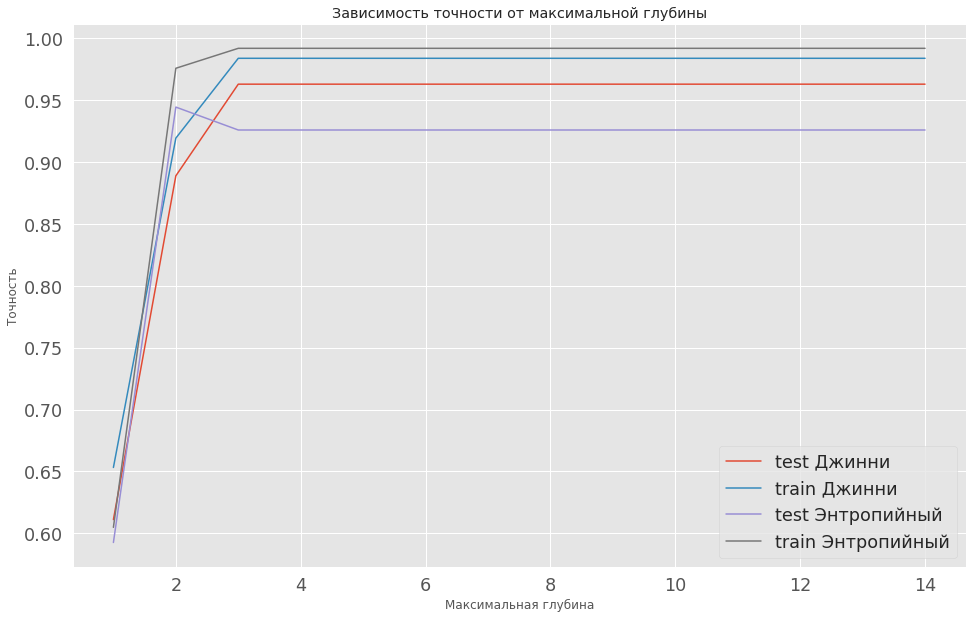

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 10))
for criterion, test, train in zip(criterion_names, test_accuracy, train_accuracy):
    plt.plot(max_depth, test, label='test ' + criterion)
    plt.plot(max_depth, train, label='train ' + criterion)
plt.title('Зависимость точности от максимальной глубины')
plt.xlabel('Максимальная глубина')
plt.ylabel('Точность')
plt.legend()
plt.show()

Сделайте выводы. Почему графики получились такими? Как соотносятся оптимальные значения параметров на обучающей и на тестовой выборках?

**Вывод.**

Вобщем, то после некоторого значения видно небольшое снижение точности из-за переобучения. Однако оно не сильное и на Джинни его совсем не заметно. Скорее всего это связано с тем, что в Джини потом просто срабатывает останов по количеству элементов в листе.

**2. Задача регрессии.**

Проделайте аналогичные шаги для задачи регрессии. В качестве датасете возьмите `boston` из `sklearn`, а в качестве критерия качества возьмите `r2_score`. Рассмотрим диапозон значений для `max_depth`: от 3 до 14.

In [20]:
boston_X, boston_y = load_boston(return_X_y=True)

In [21]:
regression_criteria = [mean_square_criterion, mean_abs_criterion]
criterion_names = ['MSE', 'MAE']

Разобьём выборку на обучение и тест.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.3, random_state=149)

Проведите эксперименты, аналогичны тем, что были сделаны для задачи классификации.

In [23]:
max_depth_grid = [3, 6, 8, 9, 11, 14]
min_samples_leaf_grid = [5, 7, 10, 20 ,30]

In [24]:
%%time
for criterion, criterion_name in zip(regression_criteria, criterion_names):
    params_grid = {'max_depth' : max_depth_grid, 'min_samples_split' : min_samples_leaf_grid}
    result = GridSearchCV(estimator=DecisionTreeRegressor(criterion=criterion), param_grid = params_grid, scoring='r2', n_jobs=-1, verbose=2, error_score='raise')
    result.fit(X_train, y_train)
    # Выведем оптимальные гиперпараметры по кросс-валидации
    optimal_max_depth = result.best_estimator_.max_depth
    optimal_min_samples_leaf = result.best_estimator_.min_samples_split
    print(f'Оптимальный max_depth: {optimal_max_depth} для {criterion_name}')
    print(f'Оптимальный min_samples_leaf: {optimal_min_samples_leaf} для {criterion_name}')
    
    # Выведем качество на тесте
    accuracy = r2_score(result.best_estimator_.predict(X_test), y_test)
    print(f'r2_score на тесте: {accuracy:.3f} для {criterion_name}')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Оптимальный max_depth: 6 для MSE
Оптимальный min_samples_leaf: 5 для MSE
r2_score на тесте: 0.845 для MSE
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Оптимальный max_depth: 9 для MAE
Оптимальный min_samples_leaf: 30 для MAE
r2_score на тесте: 0.713 для MAE
CPU times: user 8.96 s, sys: 179 ms, total: 9.13 s
Wall time: 5min 47s


Построим графики точности от глубины.

In [25]:
best_min_samples_split = [10, 10]
max_depth = [i for i in range(3, 15)]
test_accuracy = list()
train_accuracy = list()
for criterion, best_sample in zip(regression_criteria, best_min_samples_split):
    rez_test = list()
    rez_train = list()
    for i in tqdm.tqdm(max_depth):
        model = DecisionTreeRegressor(criterion=criterion, min_samples_split=best_sample, max_depth=i)
        model.fit(X_train, y_train)
        rez_test.append(r2_score(model.predict(X_test), y_test))
        rez_train.append(r2_score(model.predict(X_train), y_train))
    test_accuracy.append(rez_test)
    train_accuracy.append(rez_train)

100%|██████████| 12/12 [01:19<00:00,  6.65s/it]


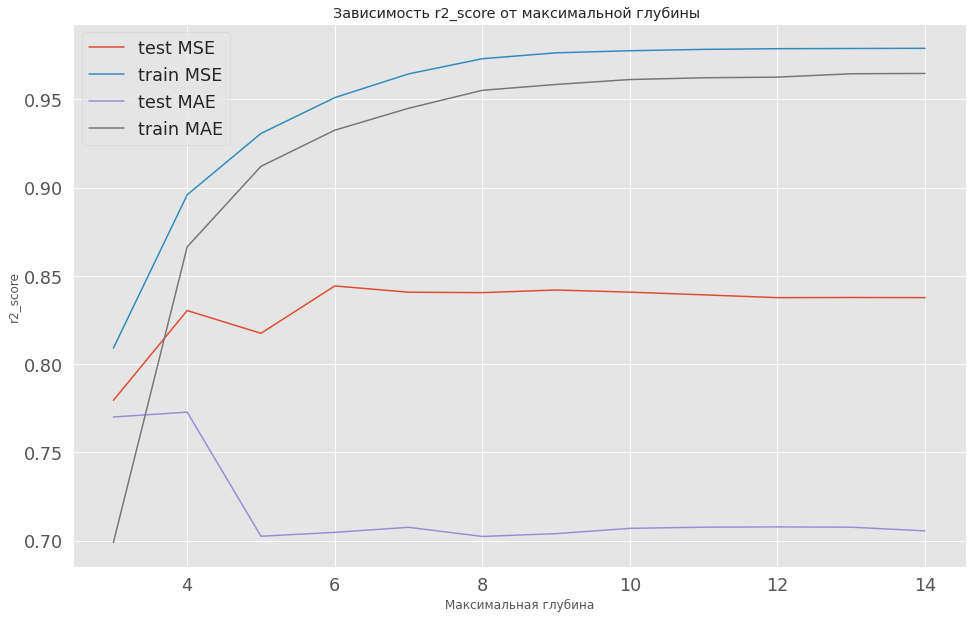

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 10))
for criterion, test, train in zip(criterion_names, test_accuracy, train_accuracy):
    plt.plot(max_depth, test, label='test ' + criterion)
    plt.plot(max_depth, train, label='train ' + criterion)
plt.title('Зависимость r2_score от максимальной глубины ')
plt.xlabel('Максимальная глубина')
plt.ylabel('r2_score')
plt.legend()
plt.show()

Сделайте вывод, в котором объясните, почему графики получились такими.

Скорее всего, вы заметили, что дерево в этих экспериментах строится довольно медленно. Как можно ускорить его построение? Можно ли ускорить нахождение оптимального разбиения по некоторому вещественному признаку?

**Вывод.**

Собственно вывод такой же как и для классификации. Для train график очевидно, что не убывает по понятным причинам, для test достигает максимума при оптимальнмо значении гипер-параметра, а затем падает из-за переобучения. Чтобы ускорить можно для каждого признака сначало отсортировать пары (признак, отклик) и искать бинпоиском оптимальный порог. С учетом того, что подсчет критерия мы производим за линию от длинны массива, то таким образом мы улучшем ассимптотику с $O(n^2)$ до $O(n\cdot logn)$ где n это количество откликов

## Задача 5

В этой задаче вам предстоит освоиться с обработкой пропусков в решающих деревьях, реализованной ранее.

Рассмотрим датасет, в котором часть данных пропущена. В качестве примера возьмём датасет https://archive.ics.uci.edu/ml/datasets/Adult для определения категории дохода работников, по таким признакам, как возраст, образование, специальность, класс работы, пол, кол-во отрабатываемых часов в неделю и некоторым другим.

In [28]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education1', 'education2', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain',
    'capital-loss', 'hours-per-week', 'native-country', 'target'
]

Поскольку предсказание в дереве на данных с пропусками часто занимает сильно больше времени, чем в случае отсутствия пропусков (так как часто приходится спускаться разу в 2 поддерева), то для экономии времени сократим датасет, взяв из него только первые 10000 строк данных.

In [29]:
adult_df = pd.read_csv('adult.data', header=None)[:10000]
adult_df.columns = column_names
target = adult_df['target'] == ' >50K'
adult_df = adult_df.drop(['target'], axis=1)
adult_df.head()

,age,workclass,fnlwgt,education1,education2,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Предобработаем датасет, заменив категориальные признаки one-hot векторами.

In [30]:
adult_df = pd.get_dummies(adult_df)
adult_df.head()

,age,fnlwgt,education2,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Поскольку все пропущенные значения относились к категориальным признакам и помечались в датасете знаком `?`, то для каждого категориального признака `feature` исходного датасета надо выполнить следующую процедуру: рассмотреть признак `feature_?` нового датасета и для всех строк, для которых выполнено `feature_?=1`, значениях всех признаков с префиксом `feature` установить в `None`. 

In [31]:
all_indices = np.arange(adult_df.shape[0])

for feature in column_names:
    if f'{feature}_ ?' in adult_df.columns:
        none_indices = all_indices[adult_df[f'{feature}_ ?'] == 1]
        
        for dummy_feature in adult_df.columns:
            if not dummy_feature.startswith(f'{feature}_ '):
                continue
            if dummy_feature != f'{feature}_ ?':
                adult_df[dummy_feature][none_indices] = None
        adult_df = adult_df.drop(f'{feature}_ ?', axis=1)

Посмотрим на распределение пропущенных значений по признакам.

In [32]:
np.sum(adult_df.isnull(), axis=0)

age                                  0
fnlwgt                               0
education2                           0
capital-gain                         0
capital-loss                         0
                                  ... 
native-country_ Thailand           181
native-country_ Trinadad&Tobago    181
native-country_ United-States      181
native-country_ Vietnam            181
native-country_ Yugoslavia         181
Length: 104, dtype: int64

Разобьём данные на обучающую и тестовую выборки в отношении 3:1.

In [33]:
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(
    adult_df, target, random_state=777
)
X_adult_train = X_adult_train.values
X_adult_test = X_adult_test.values
y_adult_train = y_adult_train.values
y_adult_test = y_adult_test.values

При помощи кросс-валидации найдём оптимальные гиперпараметры для каждого из критериев разбиения деревьев для классификации.

Сначало посмотрим на таргеты которые к нам пришли

In [34]:
y_adult_train

array([False,  True,  True, ..., False, False, False])

In [35]:
model=DecisionTreeClassifier(criterion=gini_criterion, max_depth=10)
model.fit(X_adult_train, y_adult_train)
accuracy_score(model.predict(X_adult_train), y_adult_train)

0.7626666666666667

Признак очевидно категориальный. Значит будем использовать DecisionTreeClassifier.  Создадим сетку гиперпараметров.

In [36]:
max_depth_grid = [4, 5, 6, 7]
min_samples_leaf_grid = [35,  34, 30, 27]
criterion = [gini_criterion, entropy_criterion]
criterion_names = ['Джинни', 'Энтропийный']

In [37]:
%%time
for criterion, criterion_name in zip(classification_criteria, criterion_names):
    params_grid = {'max_depth' : max_depth_grid, 'min_samples_split' : min_samples_leaf_grid}
    result = GridSearchCV(estimator=DecisionTreeClassifier(criterion=criterion), param_grid = params_grid, scoring='accuracy', n_jobs=-1, verbose=2, error_score='raise')
    result.fit(X_adult_train, y_adult_train)
    # Выведем оптимальные гиперпараметры по кросс-валидации
    optimal_max_depth = result.best_estimator_.max_depth
    optimal_min_samples_leaf = result.best_estimator_.min_samples_split
    print(f'Оптимальный max_depth: {optimal_max_depth} для {criterion_name}')
    print(f'Оптимальный min_samples_leaf: {optimal_min_samples_leaf} для {criterion_name}')
    
    # Выведем качество на тесте
    accuracy = accuracy_score(result.best_estimator_.predict(X_adult_test), y_adult_test)
    print(f'Accuracy на тесте: {accuracy:.3f} для {criterion_name}')
    assert(accuracy >= 0.85, 'Качество получилось ниже ожидаемого, поищите ошибку')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Оптимальный max_depth: 4 для Джинни
Оптимальный min_samples_leaf: 35 для Джинни
Accuracy на тесте: 0.760 для Джинни
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Оптимальный max_depth: 4 для Энтропийный
Оптимальный min_samples_leaf: 35 для Энтропийный
Accuracy на тесте: 0.760 для Энтропийный
CPU times: user 23.9 s, sys: 149 ms, total: 24 s
Wall time: 18min 35s


Проведите эксперименты c построением графиков, аналогичные тем, что были сделаны в предыдущем пункте для задач классификации и регрессии.

In [38]:
best_min_samples_split = [35, 35]
max_depth = [i + 1 for i in range(8)]
test_accuracy = list()
train_accuracy = list()
for criterion, best_sample in zip(classification_criteria, best_min_samples_split):
    rez_test = list()
    rez_train = list()
    for i in tqdm.tqdm(max_depth):
        model = DecisionTreeClassifier(criterion=criterion, min_samples_split=best_sample, max_depth=i)
        model.fit(X_adult_train, y_adult_train)
        rez_test.append(accuracy_score(model.predict(X_adult_test), y_adult_test))
        rez_train.append(accuracy_score(model.predict(X_adult_train), y_adult_train))
    test_accuracy.append(rez_test)
    train_accuracy.append(rez_train)

100%|██████████| 8/8 [03:11<00:00, 23.88s/it]


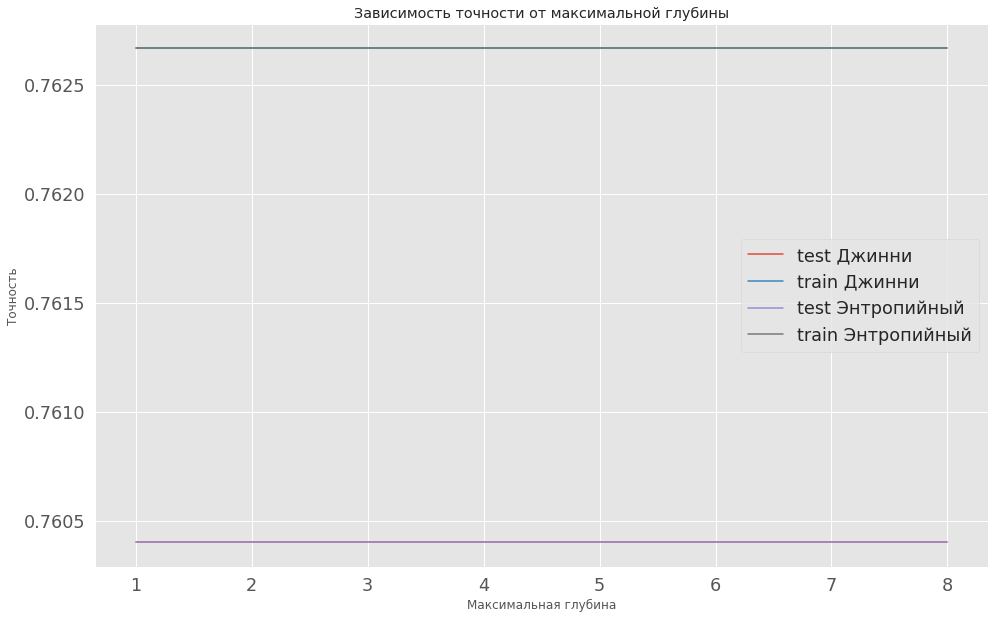

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 10))
for criterion, test, train in zip(criterion_names, test_accuracy, train_accuracy):
    plt.plot(max_depth, test, label='test ' + criterion)
    plt.plot(max_depth, train, label='train ' + criterion)
plt.title('Зависимость точности от максимальной глубины')
plt.xlabel('Максимальная глубина')
plt.ylabel('Точность')
plt.legend()
plt.show()

**Вывод.**

Cудя по всему у меня не хватает глубины, чтобы получить нормальный результат. Однако до дедлайна почти не осталось времени и придеться отсылать такой. Переобучения не наблюдаю, ну и ладно.